<a href="https://colab.research.google.com/github/vishruthvayu/derma_LLM/blob/main/DERMA_LLM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# hospital-italiano-de-buenos-aires-skin-lesions-images-2019-2022 data

In [213]:
from google.colab import files
uploaded = files.upload()

Saving metadata.csv to metadata (5).csv


In [214]:
print(data.columns)

Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'benign_malignant', 'concomitant_biopsy',
       'dermoscopic_type', 'diagnosis', 'diagnosis_1', 'diagnosis_2',
       'diagnosis_3', 'diagnosis_confirm_type', 'family_hx_mm',
       'fitzpatrick_skin_type', 'image_type', 'lesion_id', 'patient_id',
       'personal_hx_mm', 'sex'],
      dtype='object')


In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'metadata.csv'
data = pd.read_csv(file_path)

print(data.head())

        isic_id                        attribution copyright_license  \
0  ISIC_0079358  Hospital Italiano de Buenos Aires             CC-BY   
1  ISIC_0086914  Hospital Italiano de Buenos Aires             CC-BY   
2  ISIC_0088904  Hospital Italiano de Buenos Aires             CC-BY   
3  ISIC_0094098  Hospital Italiano de Buenos Aires             CC-BY   
4  ISIC_0095134  Hospital Italiano de Buenos Aires             CC-BY   

   age_approx anatom_site_general anatom_site_special benign_malignant  \
0        35.0      anterior torso                 NaN           benign   
1        55.0     upper extremity                 NaN        malignant   
2        50.0                 NaN                 NaN        malignant   
3        65.0     posterior torso                 NaN        malignant   
4        70.0      anterior torso                 NaN        malignant   

   concomitant_biopsy   dermoscopic_type             diagnosis  ...  \
0               False  contact polarized           

In [216]:
print(data.shape)
print(data.info())
print(data.describe(include='all'))
data.isnull().sum()

(1616, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 1616 non-null   object 
 1   attribution             1616 non-null   object 
 2   copyright_license       1616 non-null   object 
 3   age_approx              1611 non-null   float64
 4   anatom_site_general     1506 non-null   object 
 5   anatom_site_special     31 non-null     object 
 6   benign_malignant        1616 non-null   object 
 7   concomitant_biopsy      1616 non-null   bool   
 8   dermoscopic_type        1270 non-null   object 
 9   diagnosis               1616 non-null   object 
 10  diagnosis_1             1616 non-null   object 
 11  diagnosis_2             1616 non-null   object 
 12  diagnosis_3             1565 non-null   object 
 13  diagnosis_confirm_type  1038 non-null   object 
 14  family_hx_mm            759 n

,0
isic_id,0
attribution,0
copyright_license,0
age_approx,5
anatom_site_general,110
anatom_site_special,1585
benign_malignant,0
concomitant_biopsy,0
dermoscopic_type,346
diagnosis,0


In [217]:
data = data.drop(columns=['anatom_site_special'])

In [218]:
data['age_approx'] = data['age_approx'].fillna(data['age_approx'].median())

In [219]:
cato_col=['sex','anatom_site_general','family_hx_mm','personal_hx_mm','dermoscopic_type','diagnosis_confirm_type','fitzpatrick_skin_type']
for i in cato_col:
  data[i]=data[i].fillna(data[i].mode()[0])
  # print(data[i].mode())
  # print()
  # print(data[i].mode()[0])

/tmp/ipython-input-3927090178.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[i]=data[i].fillna(data[i].mode()[0])


In [220]:
data.isnull().sum()

,0
isic_id,0
attribution,0
copyright_license,0
age_approx,0
anatom_site_general,0
benign_malignant,0
concomitant_biopsy,0
dermoscopic_type,0
diagnosis,0
diagnosis_1,0


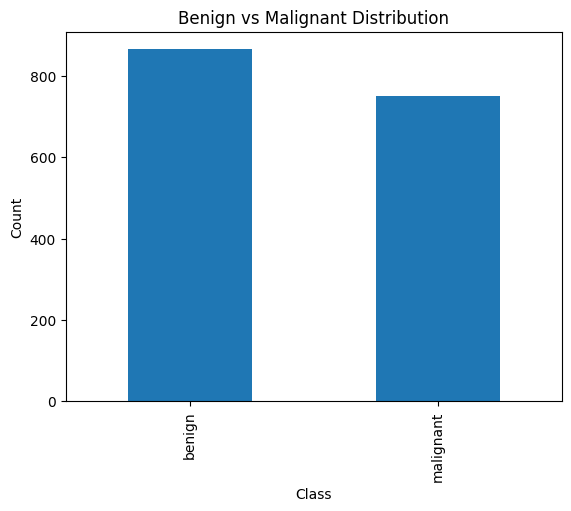

In [221]:
data['benign_malignant'].value_counts().plot(kind='bar',title='Benign vs Malignant Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'fre')

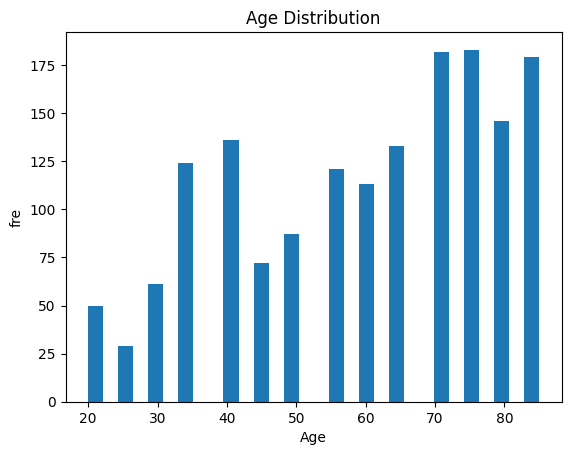

In [222]:
plt.hist(data['age_approx'],bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('fre')

Text(0.5, 1.0, 'Age Distribution by Benign vs Malignant')

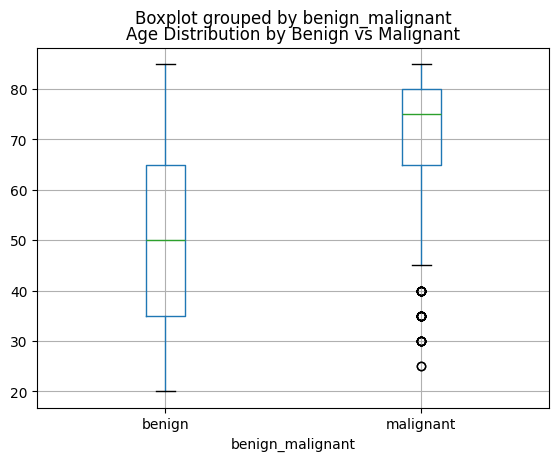

In [223]:
data.boxplot(column='age_approx',by='benign_malignant')
plt.title('Age Distribution by Benign vs Malignant')

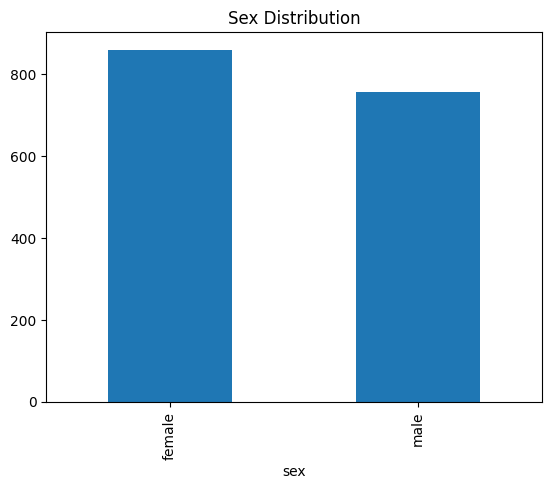

In [224]:
data['sex'].value_counts().plot(kind='bar',title='Sex Distribution')
plt.show()

In [225]:
pd.crosstab(
    data['sex'],
    data['benign_malignant'],
    normalize='index'
)


benign_malignant,benign,malignant
sex,,
female,0.577907,0.422093
male,0.486772,0.513228


<Axes: title={'center': 'Site Malignancy Distribution'}, xlabel='anatom_site_general'>

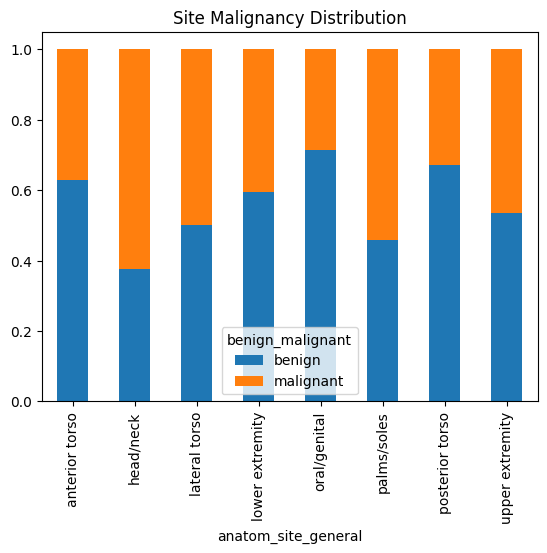

In [226]:
site_malignancy=pd.crosstab(data['anatom_site_general'],data['benign_malignant'],normalize='index')
site_malignancy.plot(kind='bar',stacked=True,title='Site Malignancy Distribution')

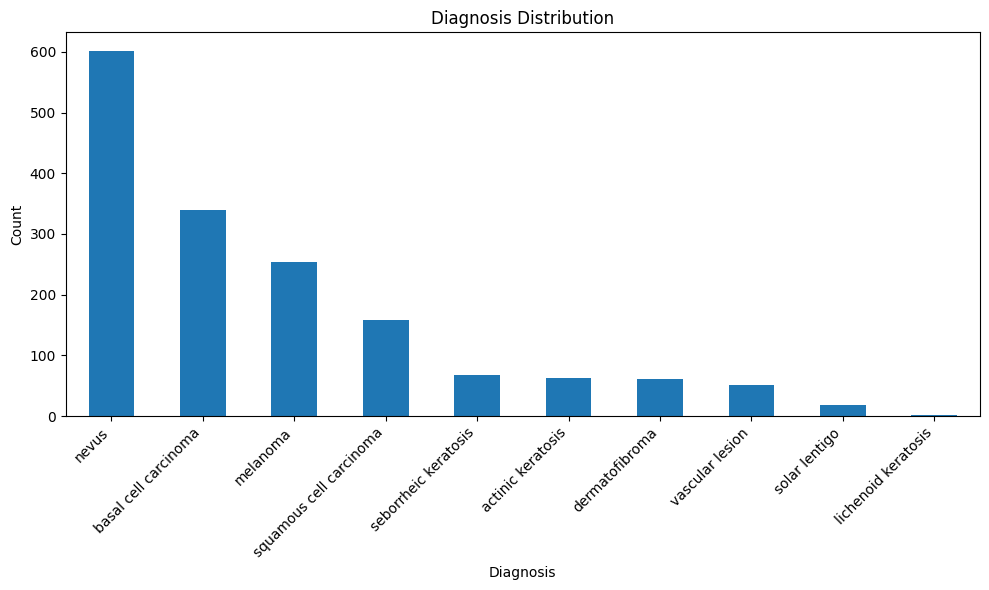

In [227]:
data['diagnosis'].value_counts().plot(kind='bar', figsize=(10, 6), title='Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [228]:
#  Strong candidates
# age_approx
# anatom_site_general

# Moderate
# sex
# dermoscopic_type

In [229]:
features = [
    'age_approx',
    'sex',
    'anatom_site_general',
    'dermoscopic_type',
    'fitzpatrick_skin_type',
    'family_hx_mm',
    'personal_hx_mm'
]

X = data[features].copy()
y = data['benign_malignant'].copy()


In [230]:
y.value_counts()


,count
benign_malignant,
benign,865
malignant,751


In [231]:
y_encoded = y.map({
    'benign': 0,
    'malignant': 1
})


In [232]:
y_encoded.value_counts()


,count
benign_malignant,
0,865
1,751


In [233]:
numeric_features = ['age_approx']

binary_features = [
    'sex',
    'family_hx_mm',
    'personal_hx_mm'
]

categorical_features = [
    'anatom_site_general',
    'dermoscopic_type',
    'fitzpatrick_skin_type'
]


In [234]:
for col in binary_features:
    print(col, X[col].unique())


sex ['female' 'male']
family_hx_mm [False  True]
personal_hx_mm [False  True]


In [235]:
X['sex'] = X['sex'].map({
    'female': 0,
    'male': 1
})


In [236]:
X['family_hx_mm'].isna().sum(), X['personal_hx_mm'].isna().sum()


(np.int64(0), np.int64(0))

In [237]:
X['family_hx_mm'] = X['family_hx_mm'].astype(int)
X['personal_hx_mm'] = X['personal_hx_mm'].astype(int)


In [238]:
categorical_features = [
    'anatom_site_general',
    'dermoscopic_type',
    'fitzpatrick_skin_type'
]

X_encoded = pd.get_dummies(
    X,
    columns=categorical_features,
    drop_first=True
)


In [239]:
X_encoded.shape, y_encoded.shape


((1616, 14), (1616,))

In [240]:
X_encoded.isna().sum().sum()


np.int64(0)

In [241]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X_encoded)

chi_score,p_val=chi2(X_scaler,y_encoded)
chi_df=pd.DataFrame(
    {
        'feature':X_encoded.columns,
        'chi_score':chi_score,
        'p_val':p_val
    }).sort_values(by='chi_score',ascending=False)
chi_df


,feature,chi_score,p_val
2,family_hx_mm,85.192305,2.707134e-20
12,fitzpatrick_skin_type_III,75.360602,3.921370e-18
0,age_approx,62.756859,2.338657e-15
4,anatom_site_general_head/neck,53.241729,2.949266e-13
3,personal_hx_mm,46.215187,1.059525e-11
9,anatom_site_general_posterior torso,23.362618,1.341605e-06
13,fitzpatrick_skin_type_IV,21.705202,3.179279e-06
11,fitzpatrick_skin_type_II,15.191719,9.712845e-05
1,sex,7.148718,7.501758e-03
6,anatom_site_general_lower extremity,4.148870,4.166233e-02


In [242]:
from sklearn.feature_selection import mutual_info_classif
mi_score=mutual_info_classif(X_encoded,y_encoded,random_state=42)
mi_df=pd.DataFrame(
    {
        'feature':X_encoded.columns,
        'mi_score':mi_score}).sort_values(by='mi_score',ascending=False)
mi_df

,feature,mi_score
0,age_approx,0.198802
12,fitzpatrick_skin_type_III,0.054909
2,family_hx_mm,0.028480
10,anatom_site_general_upper extremity,0.019966
4,anatom_site_general_head/neck,0.012000
11,fitzpatrick_skin_type_II,0.009684
3,personal_hx_mm,0.007898
8,anatom_site_general_palms/soles,0.005476
7,anatom_site_general_oral/genital,0.004224
1,sex,0.003812


In [243]:
# drop these low chi val and 0 MI score
# anatom_site_general_lateral torso
# anatom_site_general_lower extremity
# anatom_site_general_posterior torso
# fitzpatrick_skin_type_IV


In [244]:
drop_features=['anatom_site_general_lateral torso',
    'anatom_site_general_lower extremity',
    'anatom_site_general_posterior torso',
    'fitzpatrick_skin_type_IV']
X_final = X_encoded.drop(columns=drop_features)

In [245]:
X_final.shape, X_encoded.shape


((1616, 10), (1616, 14))

In [246]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_encoded,test_size=0.25,random_state=42, stratify=y_encoded)

In [247]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [248]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.78      0.71      0.75       216
           1       0.70      0.77      0.73       188

    accuracy                           0.74       404
   macro avg       0.74      0.74      0.74       404
weighted avg       0.74      0.74      0.74       404

ROC-AUC: 0.813386524822695


In [249]:
coef_df = pd.DataFrame({
    'feature': X_final.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

coef_df


,feature,coefficient
3,personal_hx_mm,0.843463
4,anatom_site_general_head/neck,0.634824
6,anatom_site_general_palms/soles,0.456227
8,fitzpatrick_skin_type_II,0.304622
1,sex,0.131702
0,age_approx,0.066340
5,anatom_site_general_oral/genital,0.037138
7,anatom_site_general_upper extremity,-0.205369
9,fitzpatrick_skin_type_III,-0.353678
2,family_hx_mm,-0.684548
